In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from src.generate_data import generate_patchy_data
from src.methods import box, kNN, rbf, voronoi
from src.compare_distributions import compare_density_error, compare_field_error

In [40]:
lx = 500; ly = 500
dx = 1; dy = 1
fine_grid_x = np.arange(0, lx, dx)
fine_grid_y = np.arange(0, ly, dy)
fine_grid   = np.array(np.meshgrid(fine_grid_x, fine_grid_y, indexing='ij'))

data, prior_distribution, angle_field = generate_patchy_data(fine_grid, n_patches=15, patch_radius=5, gaussian_smoothing_radius=2, SNR=0.1, n_data=100, seed=2, state='homeotropic')

prior_distribution = prior_distribution/np.sum(prior_distribution*dx*dy)

fig, ax = plt.subplots(ncols=1)
p1 = ax.pcolormesh(fine_grid[0], fine_grid[1], prior_distribution)
ax.quiver(fine_grid[0,::20,::20], fine_grid[1,::20,::20], np.cos(angle_field[::20, ::20]), np.sin(angle_field[::20, ::20]), color='w')
ax.axis('equal')
plt.colorbar(p1)
plt.scatter(data[:,0], data[:,1], color='red', marker='x')
#plt.quiver(data[:,0], data[:,1], np.cos(data[:,2]), np.sin(data[:,2]))
ax.axis('off')

TypeError: generate_patchy_data() got an unexpected keyword argument 'SNR'

2263


(5.0, 505.0, 5.0, 505.0)

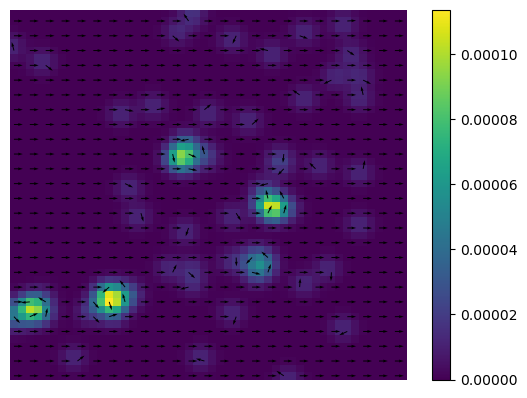

In [ ]:
cdx = 10; cdy = 10
coarse_grid_x = np.arange(0, lx, cdx)
coarse_grid_y = np.arange(0, ly, cdy)
coarse_grid = np.array(np.meshgrid(coarse_grid_x, coarse_grid_y, indexing='ij'))

adata = np.zeros_like(data[:,0], dtype=np.complex64)
adata = np.exp(1j*data[:,-1])

box_size=20; sweep_size=10
box_density, box_points = box.box_average_density(lx, ly, data[:,:2], box_size, sweep_size)
box_density = gaussian_filter(box_density, 1)
box_density = box_density/np.sum(box_density*sweep_size*sweep_size)
box_order   = box.box_average_scalar_field(lx, ly, data[:,:2], adata, box_size, sweep_size)
box_angles  = np.angle(box_order)

fig3, ax3 = plt.subplots(ncols=1)

p3 = ax3.pcolormesh(box_points[0]+sweep_size, box_points[1]+sweep_size, box_density)
plt.colorbar(p3)
plt.quiver(box_points[0,::2,::2]+sweep_size, box_points[1,::2,::2]+sweep_size, np.cos(box_angles[::2, ::2]), np.sin(box_angles[::2, ::2]))
ax3.axis('off')

(-5.0, 495.0, -5.0, 495.0)

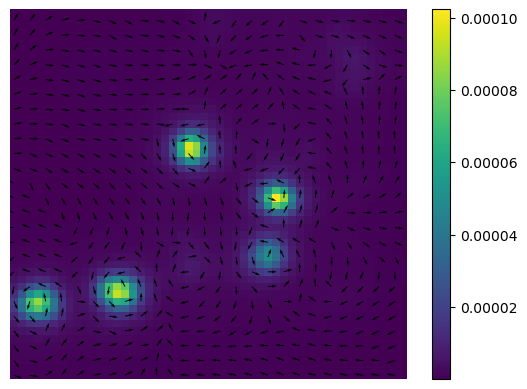

In [7]:
kNN_density = kNN.kNN_average_density(coarse_grid, data[:,:2], k=3)
kNN_density = gaussian_filter(kNN_density, 1)
kNN_density = kNN_density/np.sum(kNN_density*cdx*cdy)

kNN_order   = kNN.kNN_average_scalar_field(coarse_grid, data[:,:2], adata, k=3)
kNN_angles  = np.angle(kNN_order)

fig2, ax2 = plt.subplots(ncols=1)

#plt.pcolormesh(box_points[0]+sweep_size, box_points[1]+sweep_size, box_density/(np.sum(box_density)*cdx*cdy))
p2 = ax2.pcolormesh(coarse_grid[0], coarse_grid[1], kNN_density)
plt.colorbar(p2)
plt.quiver(coarse_grid[0,::2,::2], coarse_grid[1,::2,::2], np.cos(kNN_angles[::2, ::2]), np.sin(kNN_angles[::2, ::2]))
ax2.axis('off')

In [8]:
error_kNN, og_projected_1 = compare_density_error(prior_distribution, fine_grid, kNN_density, coarse_grid)
error_box, og_projected = compare_density_error(prior_distribution, fine_grid, box_density, box_points+sweep_size)

error_angle_kNN, og_angle_projected_1 = compare_field_error(angle_field, fine_grid, kNN_angles, coarse_grid)
error_angle_box, og_angle_projected = compare_field_error(angle_field, fine_grid, box_angles, box_points+sweep_size)

(5.0, 505.0, 5.0, 505.0)

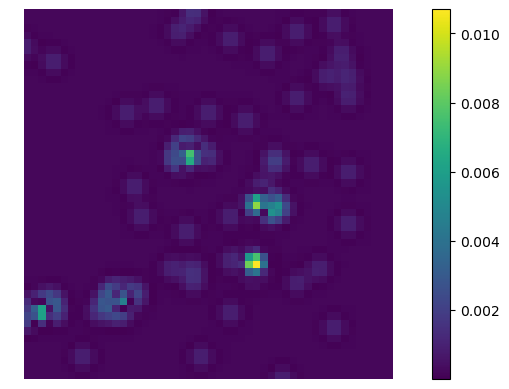

In [9]:
fig4, ax4 = plt.subplots(ncols=1)

p4 = ax4.pcolormesh(box_points[0]+sweep_size, box_points[1]+sweep_size, error_box)
ax4.axis('equal')
plt.colorbar(p4)
#plt.quiver(box_points[0,::2,::2]+sweep_size, box_points[1,::2,::2]+sweep_size, np.cos(box_angles[::2, ::2]), np.sin(box_angles[::2, ::2]))
ax4.axis('off')

(-5.0, 495.0, -5.0, 495.0)

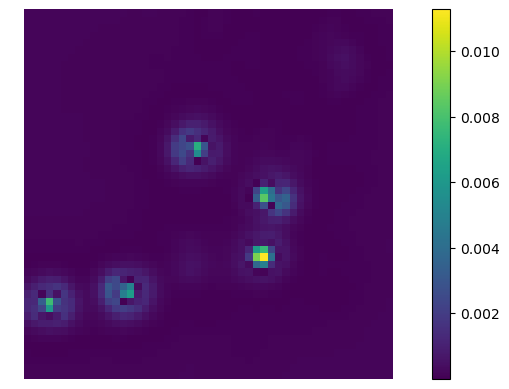

In [10]:

fig5, ax5 = plt.subplots(ncols=1)

p5 = ax5.pcolormesh(coarse_grid[0], coarse_grid[1], error_kNN)
ax5.axis('equal')
plt.colorbar(p5)
#plt.quiver(box_points[0,::2,::2]+sweep_size, box_points[1,::2,::2]+sweep_size, np.cos(box_angles[::2, ::2]), np.sin(box_angles[::2, ::2]))
ax5.axis('off')

In [20]:
print(np.sum(error_box))
print(np.sum(error_kNN))
print(np.sum(error_angle_box*box_density*cdx*cdy))
print(np.sum(error_angle_kNN*kNN_density*cdx*cdy))

0.8273437
0.5930095
1.1151342
1.0138599


1.999766097979197


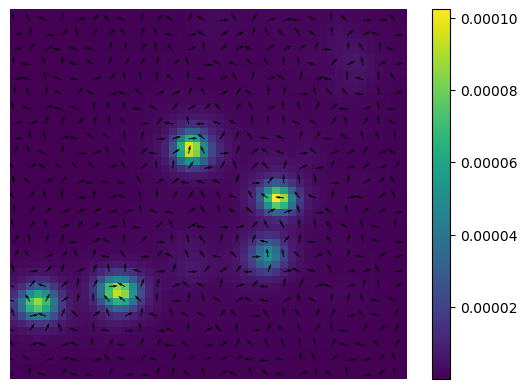

In [27]:
rbf_angles = rbf.rbf_average_scalar_field(coarse_grid, data)

rbf_angles = np.mod(rbf_angles, np.pi)

fig2, ax2 = plt.subplots(ncols=1)

#plt.pcolormesh(box_points[0]+sweep_size, box_points[1]+sweep_size, box_density/(np.sum(box_density)*cdx*cdy))
p2 = ax2.pcolormesh(coarse_grid[0], coarse_grid[1], kNN_density)
plt.colorbar(p2)
plt.quiver(coarse_grid[0,::2,::2], coarse_grid[1,::2,::2], np.cos(rbf_angles[::2, ::2]), np.sin(rbf_angles[::2, ::2]))
ax2.axis('off')

error_angle_rbf, og_angle_projected_rbf = compare_field_error(angle_field, fine_grid, rbf_angles, coarse_grid)
print(np.sum(error_angle_rbf*og_projected_1*cdx*cdy))

1.9739913379652032


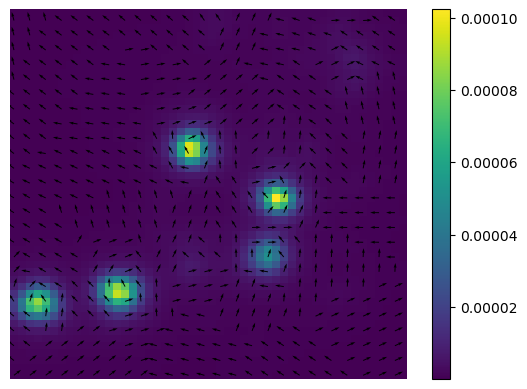

In [28]:
v_angles = voronoi.voronoi_average_scalar_field(coarse_grid, data)

v_angles = np.mod(v_angles, np.pi)

fig2, ax2 = plt.subplots(ncols=1)

#plt.pcolormesh(box_points[0]+sweep_size, box_points[1]+sweep_size, box_density/(np.sum(box_density)*cdx*cdy))
p2 = ax2.pcolormesh(coarse_grid[0], coarse_grid[1], kNN_density)
plt.colorbar(p2)
plt.quiver(coarse_grid[0,::2,::2], coarse_grid[1,::2,::2], np.cos(v_angles[::2, ::2]), np.sin(v_angles[::2, ::2]))
ax2.axis('off')

error_angle_v, og_angle_projected_v = compare_field_error(angle_field, fine_grid, v_angles, coarse_grid)
print(np.sum(error_angle_v*og_projected_1*cdx*cdy))